# Financial/Historical Data to Predict Stock Price

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from IPython.core.display import clear_output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras import callbacks

In [2]:
# load balance sheet into df
balance_sheets = pd.read_csv("balance_sheets.csv")
balance_sheets.head()

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,Symbol
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,16193000000,18149000000,3242000000,3353000000,14460000000,29673000000,45361000000,9000000,576252803,MMM
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,16267000000,18232000000,3181000000,3297000000,14448000000,29236000000,44824000000,9000000,578638253,MMM
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,16819000000,18169000000,3126000000,3330000000,13760000000,29020000000,44255000000,9000000,579675002,MMM
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,17989000000,18783000000,3278000000,3462000000,12867000000,29404000000,43821000000,9000000,577749638,MMM
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,18429000000,19582000000,2840000000,3324000000,11880000000,29570000000,43285000000,9000000,576821878,MMM


In [3]:
# load cash flow into df
cash_flow = pd.read_csv("cash_flow.csv")
cash_flow.head()

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,Symbol
0,2021-09-30,USD,1874000000,None,None,29000000,166000000,476000000,343000000,-13000000,...,None,None,None,None,-441000000,86000000,1437000000,None,1434000000,MMM
1,2021-06-30,USD,1887000000,None,None,73000000,472000000,472000000,394000000,132000000,...,None,None,None,None,-316000000,187000000,1525000000,29000000,1524000000,MMM
2,2021-03-31,USD,1688000000,None,None,197000000,509000000,460000000,310000000,205000000,...,None,None,None,None,62000000,293000000,2000000,-66000000,1624000000,MMM
3,2020-12-31,USD,2515000000,None,None,286000000,82000000,498000000,422000000,-52000000,...,None,None,None,None,102000000,104000000,1390000000,59000000,1389000000,MMM
4,2020-09-30,USD,2480000000,None,None,94000000,-113000000,481000000,368000000,128000000,...,None,None,None,None,89000000,89000000,1417000000,42000000,1430000000,MMM


In [4]:
# load earnings into df
earnings = pd.read_csv("earnings.csv")
earnings.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,Symbol
0,2021-09-30,2021-10-26,2.45,2.2084,0.2416,10.94,MMM
1,2021-06-30,2021-07-27,2.59,2.2765,0.3135,13.7711,MMM
2,2021-03-31,2021-04-27,2.77,2.2932,0.4768,20.7919,MMM
3,2020-12-31,2021-01-26,2.38,2.1678,0.2122,9.7887,MMM
4,2020-09-30,2020-10-27,2.43,2.2669,0.1631,7.1948,MMM


In [5]:
# load income statements into df
income_statements = pd.read_csv("income_statements.csv")
income_statements.head()

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,Symbol
0,2021-09-30,USD,4089000000,8942000000,4853000000,4853000000,1788000000,1819000000,482000000,1950000000,...,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,MMM
1,2021-06-30,USD,4231000000,8950000000,4719000000,4719000000,1971000000,1746000000,514000000,1880000000,...,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,MMM
2,2021-03-31,USD,4326000000,8851000000,4525000000,4525000000,1994000000,1808000000,524000000,1941000000,...,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,MMM
3,2020-12-31,USD,4195000000,8583000000,4388000000,4388000000,1849000000,1890000000,456000000,3189000000,...,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,MMM
4,2020-09-30,USD,4047000000,8350000000,4303000000,4303000000,1909000000,1677000000,461000000,1814000000,...,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,MMM


In [6]:
# load monthly prices into df
monthly_prices = pd.read_csv("monthly_prices.csv")
monthly_prices.columns = ['Date', 'open', 'high', 'low', 'close', 'volume', 'Symbol']
monthly_prices.head()

,Date,open,high,low,close,volume,Symbol
0,2022-01-21,178.32,181.780,172.5600,172.65,34039389,MMM
1,2021-12-31,172.55,179.180,169.1801,177.63,48251474,MMM
2,2021-11-30,178.53,186.300,169.9400,170.04,47872133,MMM
3,2021-10-29,176.25,183.820,173.7800,178.68,48241875,MMM
4,2021-09-30,194.55,195.606,175.3700,175.42,67366254,MMM


In [7]:
# merge all dataframes together
historical_data = pd.merge(balance_sheets, cash_flow, on = ['Symbol', 'fiscalDateEnding'])
historical_data = pd.merge(historical_data, earnings, on = ['Symbol', 'fiscalDateEnding'])
historical_data = pd.merge(historical_data, income_statements, on = ['Symbol', 'fiscalDateEnding'])
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,None,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,None,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,None,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,None,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,None,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,None,25000000,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,None,26000000,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,None,24000000,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,None,25000000,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000


In [8]:
historical_data['currentQuarterPrice'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,131000000,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,134000000,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,133000000,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,153000000,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,137000000,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,25000000,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,26000000,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,24000000,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,25000000,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN


In [9]:
historical_data['nextQuarterPrice'] = np.nan
historical_data

,fiscalDateEnding,reportedCurrency_x,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice,nextQuarterPrice
0,2021-09-30,USD,48278000000,16426000000,4878000000,4878000000,4950000000,4916000000,31852000000,9323000000,...,1758000000,324000000,117000000,1433000000,1300000000,1875000000,2006000000,1434000000,NaN,NaN
1,2021-06-30,USD,48307000000,16343000000,4695000000,805000000,4842000000,4991000000,31995000000,9358000000,...,1939000000,415000000,121000000,1523000000,1805000000,2060000000,2194000000,1524000000,NaN,NaN
2,2021-03-31,USD,47180000000,15345000000,4636000000,501000000,4458000000,4817000000,31866000000,9240000000,...,1943000000,319000000,132000000,1626000000,1578000000,2075000000,2208000000,1624000000,NaN,NaN
3,2020-12-31,USD,47344000000,14982000000,4634000000,404000000,4239000000,4705000000,34027000000,9421000000,...,1705000000,316000000,10000000,4185000000,1688000000,1846000000,1999000000,1389000000,NaN,NaN
4,2020-09-30,USD,45390000000,14110000000,4121000000,440000000,3984000000,4623000000,31314000000,9216000000,...,1800000000,391000000,128000000,1418000000,1745000000,1928000000,2065000000,1430000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,2017-12-31,USD,8586000000,4217000000,1564000000,1564000000,1427000000,1060000000,4289000000,1435000000,...,431000000,350000000,50000000,80000000,31000000,481000000,506000000,81000000,NaN,NaN
9165,2017-09-30,USD,9288000000,4894000000,1981000000,1981000000,1490000000,None,4394000000,1388000000,...,415000000,117000000,43000000,296000000,385000000,458000000,484000000,298000000,NaN,NaN
9166,2017-06-30,USD,7802000000,3584000000,705000000,705000000,1498000000,None,4218000000,1355000000,...,345000000,98000000,41000000,247000000,257000000,386000000,410000000,247000000,NaN,NaN
9167,2017-03-31,USD,7649000000,3383000000,629000000,629000000,1535000000,None,4266000000,1368000000,...,336000000,98000000,41000000,239000000,284000000,377000000,402000000,238000000,NaN,NaN


In [10]:
# get all tickers and quarterly dates
tickers = historical_data['Symbol'].unique()
quarterlyDates = historical_data[['fiscalDateEnding', 'Symbol']]
quarterlyDates

,fiscalDateEnding,Symbol
0,2021-09-30,MMM
1,2021-06-30,MMM
2,2021-03-31,MMM
3,2020-12-31,MMM
4,2020-09-30,MMM
...,...,...
9164,2017-12-31,ZTS
9165,2017-09-30,ZTS
9166,2017-06-30,ZTS
9167,2017-03-31,ZTS


In [11]:
# get current quarter price
for i in (historical_data.index):
    date = historical_data.loc[i]['fiscalDateEnding']
    sym = historical_data.loc[i]['Symbol']
    year_month = date[:7]
    company_price = monthly_prices[(monthly_prices['Symbol'] == sym)]
    backup = company_price
    company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
    if len(company_price) == 0:
        #backup = backup[backup['Date'] == min(backup['Date'])]
        #historical_data.at[i, 'currentQuarterPrice'] = backup.iloc[0]['close']
        historical_data = historical_data.drop([i])
        #continue
    else:
        company_price = company_price[company_price['Date'] == max(company_price['Date'])]
        historical_data.at[i, 'currentQuarterPrice'] = company_price.iloc[0]['close']

In [12]:
# get next quarter price
months = ['03', '06', '09', '12']
for i in (historical_data.index):
    sym = historical_data.loc[i]['Symbol']
    date = historical_data.loc[i]['fiscalDateEnding']
    year = date[:4]
    month = date[5:7]
    day = date[9:]
    test = historical_data[historical_data['Symbol'] == sym]
    company_price = monthly_prices[(monthly_prices['Symbol'] == sym)]
    company_price = company_price[company_price['Date'] > date]
    if month in months:
        idx = months.index(month)
        if idx == len(months) - 1:
            idx = 0
            year = str(int(year) + 1)
        else:
            idx += 1
        year_month = year + '-' + months[idx]
        company_price = company_price[company_price['Date'].str.contains(year_month, regex = False) == True]
        if len(company_price) == 0:
            historical_data = historical_data.drop([i])
        else:
            company_price = company_price[company_price['Date'] == max(company_price['Date'])]
            historical_data.at[i, 'nextQuarterPrice'] = company_price.iloc[0]['close']
    else:
        historical_data = historical_data.drop([i])

In [13]:
# check for nan values in nextQuarter
count = 0
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['nextQuarterPrice']):
        #print(historical_data.iloc[i]['Symbol'])
        count += 1
count

0

In [14]:
# check for nan values in currentQuarter
count = 0
for i in range(len(historical_data)):
    if math.isnan(historical_data.iloc[i]['currentQuarterPrice']):
        #print(historical_data.iloc[i]['Symbol'])
        count += 1
count

0

In [15]:
# get non numeric columns
non_numeric_columns = []
for i in historical_data.columns:
    try:
        float(historical_data[i].iloc[0])
    except:
        non_numeric_columns.append(i)
non_numeric_columns

['fiscalDateEnding',
 'reportedCurrency_x',
 'longTermInvestments',
 'Symbol',
 'reportedCurrency_y',
 'paymentsForOperatingActivities',
 'proceedsFromOperatingActivities',
 'paymentsForRepurchaseOfPreferredStock',
 'dividendPayoutPreferredStock',
 'proceedsFromIssuanceOfCommonStock',
 'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet',
 'proceedsFromIssuanceOfPreferredStock',
 'changeInExchangeRate',
 'reportedDate',
 'reportedCurrency',
 'investmentIncomeNet',
 'depreciation']

In [16]:
correlation = historical_data.drop(non_numeric_columns, axis = 1)
correlation = correlation.replace('None', np.NaN)
correlation = correlation.astype('float64')
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(correlation))
newDf.columns = correlation.columns
newDf.index = correlation.index
correlation = newDf
correlation = (correlation - correlation.mean()) / correlation.std()
correlation = correlation.corr()['nextQuarterPrice'].drop(['nextQuarterPrice'])
correlation = correlation[correlation > .1].index
correlation

Index(['currentNetReceivables', 'currentAccountsPayable',
       'capitalLeaseObligations', 'totalShareholderEquity', 'commonStock',
       'operatingCashflow', 'depreciationDepletionAndAmortization',
       'capitalExpenditures', 'profitLoss',
       'paymentsForRepurchaseOfCommonStock', 'paymentsForRepurchaseOfEquity',
       'netIncome_x', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'sellingGeneralAndAdministrative',
       'researchAndDevelopment', 'operatingExpenses', 'nonInterestIncome',
       'depreciationAndAmortization', 'incomeBeforeTax',
       'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax',
       'ebit', 'ebitda', 'netIncome_y', 'currentQuarterPrice'],
      dtype='object')

In [23]:
', '.join(correlation)

'currentNetReceivables, currentAccountsPayable, capitalLeaseObligations, totalShareholderEquity, commonStock, operatingCashflow, depreciationDepletionAndAmortization, capitalExpenditures, profitLoss, paymentsForRepurchaseOfCommonStock, paymentsForRepurchaseOfEquity, netIncome_x, grossProfit, totalRevenue, costOfRevenue, costofGoodsAndServicesSold, sellingGeneralAndAdministrative, researchAndDevelopment, operatingExpenses, nonInterestIncome, depreciationAndAmortization, incomeBeforeTax, netIncomeFromContinuingOperations, comprehensiveIncomeNetOfTax, ebit, ebitda, netIncome_y, currentQuarterPrice'

In [266]:
historical_data.to_csv("final_historical_data.csv", index = False)

In [19]:
# neural network predicting price
date_split = '2018-09-30'
df = historical_data
X_training_index = df[df['fiscalDateEnding'] < date_split].index
X_testing_index = df[df['fiscalDateEnding'] >= date_split].index
y_training_index = df['nextQuarterPrice'][df['fiscalDateEnding'] < date_split].index
y_testing_index = df['nextQuarterPrice'][df['fiscalDateEnding'] >= date_split].index
currentPrice = df['currentQuarterPrice']
X = df.drop(non_numeric_columns, axis = 1)
X = X.drop(['nextQuarterPrice'], axis = 1)
X = X.replace('None', np.NaN)
X = X.astype('float64')
X = (X - X.mean()) / X.std()
X['currentQuarterPrice'] = currentPrice
imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
newDf = pd.DataFrame(imp.fit_transform(X))
newDf.columns = X.columns
newDf.index = X.index
X = newDf
X = X[correlation]
# Y = df['inc_or_dec']
Y = df['nextQuarterPrice']
#encoder = LabelEncoder()
#encoder.fit(Y)
#encoded_Y = encoder.transform(Y)
#Y = np_utils.to_categorical(encoded_Y)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25) # SPY fix into consecutive years
X_train = X.loc[X_training_index]
X_test = X.loc[X_testing_index]
y_train = Y.loc[y_training_index]
y_test = Y.loc[y_testing_index]
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(28, )))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) #softmax #tfidf
model.fit(X_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
30/30 [==============================] - 0s 1ms/step - loss: 53097.6719 - mean_absolute_error: 118.7074
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 52922.2461 - mean_absolute_error: 118.3864
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 50645.8555 - mean_absolute_error: 115.8146
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 41898.8086 - mean_absolute_error: 104.2255
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 19432.3398 - mean_absolute_error: 68.4878
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 2152.1365 - mean_absolute_error: 15.6495
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 1194.2520 - mean_absolute_error: 10.8099
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 1174.7073 - mean_absolute_error: 10.7398
Epoch 9/10
30/30 [==============================] - 0s 1ms/step - loss: 1240.2153 - mea

In [21]:
X_train

,currentNetReceivables,currentAccountsPayable,capitalLeaseObligations,totalShareholderEquity,commonStock,operatingCashflow,depreciationDepletionAndAmortization,capitalExpenditures,profitLoss,paymentsForRepurchaseOfCommonStock,...,operatingExpenses,nonInterestIncome,depreciationAndAmortization,incomeBeforeTax,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,currentQuarterPrice
13,3.677491e-01,-0.044222,-6.642656e-18,-0.174482,-0.215338,0.197098,0.031899,-0.016554,0.542483,0.883751,...,-0.007381,0.519986,-0.299951,0.650219,0.444285,0.471092,0.367037,0.320133,0.593620,196.72
14,3.467399e-01,-0.043639,-6.642656e-18,-0.157939,-0.215338,-0.180432,0.034009,-0.075431,-0.030399,0.410720,...,0.369161,0.456537,-0.298268,0.077888,-0.045293,0.092400,0.009401,-0.032288,-0.010840,219.52
15,2.920519e-01,-0.029839,-6.642656e-18,-0.142098,-0.215338,0.188713,-0.000809,0.074175,-0.067345,0.101787,...,0.502270,-0.381473,-0.278061,0.371084,1.205158,-0.100195,0.213433,0.171959,-0.048890,235.37
16,3.313438e-01,-0.053358,-6.642656e-18,-0.126339,-0.215338,0.165064,0.028734,-0.055161,0.346809,0.013317,...,0.087654,-0.375238,-0.320158,0.504655,0.277065,0.407976,0.268494,0.219912,0.387477,209.90
17,2.933349e-01,-0.061521,-6.642656e-18,-0.141341,-0.215338,0.141844,0.031899,-0.077361,0.416139,0.094652,...,-0.056547,-0.328280,-0.326893,0.565445,0.336313,0.425612,0.305544,0.255433,0.461650,208.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,-3.255537e-01,-0.357162,-6.642656e-18,-0.406821,-0.215783,-0.080460,-0.302568,-0.288739,-0.270317,-0.168618,...,-0.259808,-0.373026,-0.363939,-0.141285,-0.250324,-0.276082,-0.135197,-0.184775,-0.261775,72.04
9165,1.701389e-17,-0.366491,-6.642656e-18,-0.400901,-0.215783,-0.116794,-0.307843,-0.322521,-0.171795,-0.168618,...,-0.279595,-0.372523,-0.362255,-0.147902,-0.166129,-0.111797,-0.141115,-0.190357,-0.157259,63.76
9166,1.701389e-17,-0.369213,-6.642656e-18,-0.408307,-0.215783,-0.172477,-0.306788,-0.319625,-0.194145,-0.168618,...,-0.280194,-0.372624,-0.365623,-0.176849,-0.185228,-0.171199,-0.159640,-0.209133,-0.181823,62.38
9167,1.701389e-17,-0.362993,-6.642656e-18,-0.411173,-0.215783,-0.185592,-0.303623,-0.328312,-0.197794,-0.168618,...,-0.287089,-0.372021,-0.363939,-0.180571,-0.188347,-0.158669,-0.161955,-0.211162,-0.186157,53.37


In [24]:
# get MAE of neural network
model.evaluate(X_test, y_test)

176/176 [==============================] - 0s 615us/step - loss: 2456.6086 - mean_absolute_error: 19.1220


[2456.608642578125, 19.122032165527344]

In [285]:
# find stocks that are predicted to increase by more than 15%
predict = historical_data.loc[X_test.index]
predict = predict[predict['fiscalDateEnding'] == date_split]
predict = X_test.loc[predict.index]
predicted = model.predict(predict)
new_df = historical_data.loc[predict.index, ['Symbol', 'fiscalDateEnding','currentQuarterPrice', 'nextQuarterPrice']]
new_df['predicted'] = predicted
new_df['percentChangePredicted'] = ((new_df['predicted'] - new_df['currentQuarterPrice']) / new_df['currentQuarterPrice']) * 100
new_df = new_df[new_df['percentChangePredicted'] <= -15]
new_df = new_df[new_df['Symbol'] != 'GE']
new_df

,Symbol,fiscalDateEnding,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted


In [286]:
# invest 10000 evenly across top projected companies equally
init_investment = 10000
dates = historical_data.loc[X_test.index]['fiscalDateEnding'].unique()
dates.sort()
n = 10
i = 0
nShort = 1
portfolio = pd.DataFrame({})

for d in dates:
    # get top N price change predicted for a given quarter
    predicted_data = historical_data.loc[X_test.index]
    predicted_data = predicted_data[predicted_data['fiscalDateEnding'] == d]
    predicted_data = X_test.loc[predicted_data.index]
    predicted = model.predict(predicted_data)
    predicted_data = historical_data.loc[predicted_data.index, ['Symbol', 'fiscalDateEnding','currentQuarterPrice', 'nextQuarterPrice']]
    predicted_data['predicted'] = predicted
    predicted_data['percentChangePredicted'] = ((predicted_data['predicted'] - predicted_data['currentQuarterPrice']) / predicted_data['currentQuarterPrice']) * 100
    predicted_data = predicted_data[predicted_data['Symbol'] != 'GE']
    predicted_data = predicted_data.sort_values(by = ['percentChangePredicted'], ascending = False)
    top_n = predicted_data.iloc[0:n]
    top_n = top_n[top_n['percentChangePredicted'] > 0]
    top_n['BuyOrShort'] = 'Buy'
    short = predicted_data.iloc[len(predicted_data) - 1].to_frame().T
    #short = short[short['percentChangePredicted'] < -30]
    portfolio = portfolio.append(top_n)
    portfolio = portfolio.append(short)
        
portfolio

,Symbol,fiscalDateEnding,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted,BuyOrShort
3900,GM,2018-09-30,33.67,33.45,40.3148,19.7352,Buy
3402,XOM,2018-09-30,85.02,68.19,99.6722,17.2338,Buy
4518,INTC,2018-09-30,47.29,46.93,54.9769,16.2548,Buy
3776,FCX,2018-09-30,13.92,10.31,16.0362,15.2026,Buy
3068,ENPH,2018-09-30,4.85,4.73,5.56166,14.6734,Buy
...,...,...,...,...,...,...,...
487,AMCR,2021-09-30,11.59,12.01,13.2945,14.7067,Buy
5302,LUMN,2021-09-30,12.39,12.55,14.192,14.544,Buy
5362,MRO,2021-09-30,13.67,16.42,15.5055,13.4274,Buy
5005,KMI,2021-09-30,16.73,15.86,18.8652,12.7628,Buy


In [287]:
portfolio[portfolio['BuyOrShort'] != 'Buy']

,Symbol,fiscalDateEnding,currentQuarterPrice,nextQuarterPrice,predicted,percentChangePredicted,BuyOrShort
3653,F,2018-09-30,9.25,7.65,8.8948,-3.84004,NaN
5056,KHC,2018-12-31,43.04,32.65,38.4617,-10.6374,NaN
952,T,2019-03-31,31.36,33.51,28.6241,-8.72426,NaN
951,T,2019-06-30,33.51,37.84,31.7453,-5.26625,NaN
7453,SLB,2019-09-30,34.17,40.2,34.391,0.646629,NaN
8841,WFC,2019-12-31,53.8,28.7,53.8782,0.145312,NaN
544,AAL,2020-03-31,12.19,13.07,11.5143,-5.5431,NaN
6356,OXY,2020-06-30,18.3,10.01,16.793,-8.23484,NaN
542,AAL,2020-09-30,12.29,15.77,11.127,-9.46271,NaN
3393,XOM,2020-12-31,41.22,55.83,32.0006,-22.3664,NaN


In [288]:
portfolio_value = pd.DataFrame({})
running_total = init_investment
for i in range(len(dates)):
    amount_invested_per_stock = 500
    if i == 0:
        portfolio_value = portfolio_value.append(pd.DataFrame({dates[i]: [init_investment]}).T)
        continue
    tmp = portfolio[(portfolio['fiscalDateEnding'] == dates[i-1]) & (portfolio['BuyOrShort'] == 'Buy')]
    tmp['returnPercentage'] = tmp['nextQuarterPrice'] / tmp['currentQuarterPrice']
    while ((len(tmp) * amount_invested_per_stock) > running_total) and amount_invested_per_stock >= 0:
        amount_invested_per_stock -= 50
    tmp['Value'] = tmp['returnPercentage'] * amount_invested_per_stock
    total = running_total - (len(tmp) * amount_invested_per_stock)
    total += tmp['Value'].sum()
    running_total = total
    portfolio_value = portfolio_value.append(pd.DataFrame({dates[i]: [running_total]}).T)
    
portfolio_value.columns = ['Total']
portfolio_value

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_1861/2833409324.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['returnPercentage'] = tmp['nextQuarterPrice'] / tmp['currentQuarterPrice']
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_1861/2833409324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Value'] = tmp['returnPercentage'] * amount_invested_per_stock


,Total
2018-09-30,10000.000000
2018-12-31,9511.983910
2019-03-31,10454.099516
2019-06-30,10715.106877
2019-09-30,10684.671084
2019-12-31,11268.290573
2020-03-31,9720.135943
2020-06-30,12743.133306
2020-09-30,12999.638695
2020-12-31,14628.696167


In [293]:
# compare investments to SPY
init_investment = 10000
SPY = pd.read_csv("SPY.csv")
SPY.columns = ['Date', 'open', 'high', 'low', 'close', 'volume']
#SPY = SPY.set_index('Date')
SPY

,Date,open,high,low,close,volume
0,2022-02-10,450.6800,458.1200,443.8300,449.3200,875173665
1,2022-01-31,476.3000,479.9800,420.7600,449.9100,2478637614
2,2021-12-31,461.6400,479.0000,448.9200,474.9600,1926485453
3,2021-11-30,460.3000,473.5400,455.3000,455.5600,1329958701
4,2021-10-29,430.9800,459.5600,426.3600,459.2500,1508665331
...,...,...,...,...,...,...
262,2000-04-28,150.1250,153.1093,133.5000,145.0937,229246200
263,2000-03-31,137.6250,155.7500,135.0312,150.3750,247594900
264,2000-02-29,139.7500,144.5625,132.7187,137.4375,186938300
265,2000-01-31,148.2500,148.2500,135.0000,139.5625,156770800


In [294]:
SPY[SPY['Date'].str.contains('2018-09')]

,Date,open,high,low,close,volume
41,2018-09-28,289.84,293.94,286.71,290.72,1228083461


In [295]:
# get SPY totals if invest 1000 over a year
SPY_test = pd.DataFrame({})
for d in portfolio_value.index:
    if d in SPY['Date'].to_list():
        SPY_test = SPY_test.append(SPY[SPY['Date'] == d])
    else:
        year_month = d[:7]
        all_dates = SPY[SPY['Date'].str.contains(year_month)]
        SPY_test = SPY_test.append(all_dates)
SPY_test = SPY_test.sort_values(by = ['Date'])
SPY_test['Cumul. Return'] = SPY_test['close'] / float(SPY_test.iloc[0]['close'])
SPY_test['SPY_Total'] = init_investment * SPY_test['Cumul. Return']
SPY_test

,Date,open,high,low,close,volume,Cumul. Return,SPY_Total
41,2018-09-28,289.84,293.94,286.71,290.72,1228083461,1.000000,10000.000000
38,2018-12-31,280.28,280.40,233.76,249.92,3102621849,0.859659,8596.587782
35,2019-03-29,280.44,285.18,272.42,282.48,1678081316,0.971657,9716.565768
32,2019-06-28,275.31,296.31,273.09,293.00,1340435548,1.007843,10078.425977
29,2019-09-30,290.57,302.63,289.27,296.77,1322797499,1.020810,10208.104018
26,2019-12-31,314.59,323.80,307.13,321.86,1281220574,1.107113,11071.133737
23,2020-03-31,298.21,313.84,218.26,257.75,5888710884,0.886592,8865.919097
20,2020-06-30,303.62,323.41,296.74,308.36,2347940437,1.060677,10606.769400
17,2020-09-30,350.21,358.75,319.80,334.89,1815146487,1.151933,11519.331315
14,2020-12-31,365.57,378.46,362.03,373.88,1342397107,1.286048,12860.484315


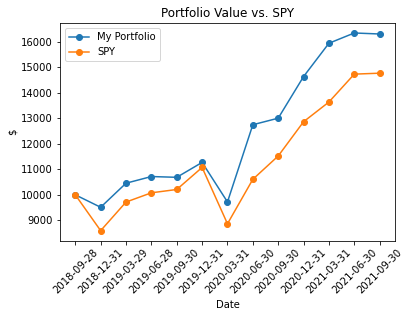

In [292]:
# plot of portfolio totals vs. SPY if buy and hold
plt.plot(SPY_test['Date'], portfolio_value['Total'], '-o', label = 'My Portfolio')
plt.plot(SPY_test['Date'], SPY_test['SPY_Total'], '-o', label = 'SPY')
plt.legend()
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Portfolio Value vs. SPY')
plt.xticks(rotation=45)
plt.show()

In [277]:
# short sell stock so my portfolio doesn't follow sp500 
# 30% thresh hold for shorting
# buying / selling = 9
# another graph with short selling

In [278]:
# invest 10000 evenly across top projected companies equally
portfolio_value_short = pd.DataFrame({})
running_total = init_investment
for i in range(len(dates)):
    amount_invested_per_stock = 500
    if i == 0:
        portfolio_value_short = portfolio_value_short.append(pd.DataFrame({dates[i]: [init_investment]}).T)
        continue
    tmp = portfolio[(portfolio['fiscalDateEnding'] == dates[i-1]) & (portfolio['BuyOrShort'] == 'Buy')]
    tmp2 = portfolio[(portfolio['fiscalDateEnding'] == dates[i-1]) & (portfolio['BuyOrShort'] != 'Buy')]
    tmp['returnPercentage'] = tmp['nextQuarterPrice'] / tmp['currentQuarterPrice']
    
    while ((len(tmp) * amount_invested_per_stock) > running_total) and amount_invested_per_stock >= 0:
        amount_invested_per_stock -= 50
    tmp['Value'] = tmp['returnPercentage'] * amount_invested_per_stock
    total = running_total - ((len(tmp) * amount_invested_per_stock) + (len(tmp2) * amount_invested_per_stock))
    total += tmp['Value'].sum()
    if len(tmp2) > 0:
        tmp2['returnPercentage'] = tmp2['currentQuarterPrice'] / tmp2['nextQuarterPrice']
        tmp2['Value'] = tmp2['returnPercentage'] * amount_invested_per_stock
        total += tmp2['Value'].sum()
    running_total = total
    portfolio_value_short = portfolio_value_short.append(pd.DataFrame({dates[i]: [running_total]}).T)
    
portfolio_value_short.columns = ['Total']
portfolio_value_short

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_1861/570978297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['returnPercentage'] = tmp['nextQuarterPrice'] / tmp['currentQuarterPrice']
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_1861/570978297.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Value'] = tmp['returnPercentage'] * amount_invested_per_stock
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_1861/570978297.py:19: SettingWithCopyWarning: 
A valu

,Total
2018-09-30,10000.000000
2018-12-31,9331.155998
2019-03-31,10627.431668
2019-06-30,10945.073604
2019-09-30,11040.121224
2019-12-31,11587.787009
2020-03-31,9586.033793
2020-06-30,11347.819590
2020-09-30,12505.926235
2020-12-31,13598.417594


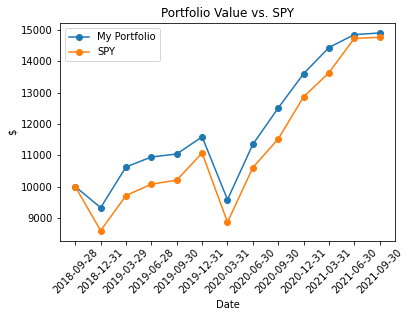

In [279]:
# plot of portfolio totals vs. SPY if buy and short
plt.plot(SPY_test['Date'], portfolio_value_short['Total'], '-o', label = 'My Portfolio')
plt.plot(SPY_test['Date'], SPY_test['SPY_Total'], '-o', label = 'SPY')
plt.legend()
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Portfolio Value vs. SPY')
plt.xticks(rotation=45)
plt.show()

In [280]:
portfolio_value

,Total
2018-09-30,10000.000000
2018-12-31,9285.163529
2019-03-31,10630.630574
2019-06-30,10938.493598
2019-09-30,11090.755806
2019-12-31,11713.421591
2020-03-31,9585.593876
2020-06-30,11506.249069
2020-09-30,12250.269800
2020-12-31,13347.107473


In [281]:
portfolio_value_short

,Total
2018-09-30,10000.000000
2018-12-31,9331.155998
2019-03-31,10627.431668
2019-06-30,10945.073604
2019-09-30,11040.121224
2019-12-31,11587.787009
2020-03-31,9586.033793
2020-06-30,11347.819590
2020-09-30,12505.926235
2020-12-31,13598.417594


In [282]:
# Strategy1 - buy top ten predicted to increase, sell after each quarter
# Strategy2 - buy top ten, short predicted to decrease the most, sell after each quarter
pd.DataFrame({'Strategy1' : portfolio_value['Total'].to_list(), 'Strategy2' : portfolio_value_short['Total'].to_list()})

,Strategy1,Strategy2
0,10000.000000,10000.000000
1,9285.163529,9331.155998
2,10630.630574,10627.431668
3,10938.493598,10945.073604
4,11090.755806,11040.121224
5,11713.421591,11587.787009
6,9585.593876,9586.033793
7,11506.249069,11347.819590
8,12250.269800,12505.926235
9,13347.107473,13598.417594
